# Spoken Digit recognition
Spoken digit recognition using the Mel-frequency cepstral coefficients (MFCCs) and convolution neural networks (CNN). The model can recognize 0-9 spoken digits from .wav audio files by passing their MFCCs as an image input. My model achieves an accuracy of 94% on the test audio files. 


    








In [14]:
## For Preprocessing
import os
import shutil
from os import listdir
from os.path import isfile, join
from os import path
import pickle

## To create melspectrum frequency coefficients
import librosa
import librosa.display

## Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import seaborn as sn

## Tensorflow to access CNNs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.utils import to_categorical

## sklearn to generate classification report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Dataset
## Tensorflow speech command dataset

An audio dataset of spoken words designed to help train and evaluate keyword spotting systems. I have extracted the spoken digits wave files from the dataset that contains 30 different commands. There are 21,114 training and validation audio files. The rest i.e., 2552 are the test files.

## Visualizing the dataset
Raw wave and spectrogram of the sample audio files for each digit.

In [49]:
# Current directory path
dir_path = os.getcwd()

# Sample audio for '0'
zeroWave = dir_path + "//SpeechCommands//zero//0bde966a_nohash_0.wav"
sample_rate_zero, samples_zero = wavfile.read(zeroWave)

# Sample audio for '1'
oneWave = dir_path + "//SpeechCommands//one//00f0204f_nohash_0.wav"
sample_rate_one, samples_one = wavfile.read(oneWave)

# Sample audio for '2'
twoWave = dir_path + "//SpeechCommands//two//00b01445_nohash_0.wav"
sample_rate_two, samples_two = wavfile.read(twoWave)

# Sample audio for '3'
threeWave = dir_path + "//SpeechCommands//three//00b01445_nohash_0.wav"
sample_rate_three, samples_three = wavfile.read(threeWave)

# Sample audio for '4'
fourWave = dir_path + "//SpeechCommands//four//00f0204f_nohash_0.wav"
sample_rate_four, samples_four = wavfile.read(fourWave)

# Sample audio for '5'
fiveWave = dir_path + "//SpeechCommands//five//0ff728b5_nohash_2.wav"
sample_rate_five, samples_five = wavfile.read(fiveWave)

# Sample audio for '6'
sixWave = dir_path + "//SpeechCommands//six//00b01445_nohash_0.wav"
sample_rate_six, samples_six = wavfile.read(sixWave)

# Sample audio for '7'
sevenWave = dir_path + "//SpeechCommands//seven//0a0b46ae_nohash_0.wav"
sample_rate_seven, samples_seven = wavfile.read(sevenWave)

# Sample audio for '8'
eightWave = dir_path + "//SpeechCommands//eight//00b01445_nohash_0.wav"
sample_rate_eight, samples_eight = wavfile.read(eightWave)

# Sample audio for '9'
nineWave = dir_path + "//SpeechCommands//nine//00b01445_nohash_0.wav"
sample_rate_nine, samples_nine = wavfile.read(nineWave)

Text(0.5, 0, 'Seconds')

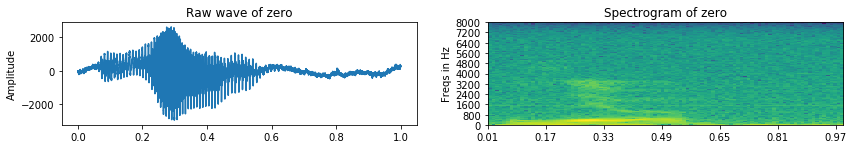

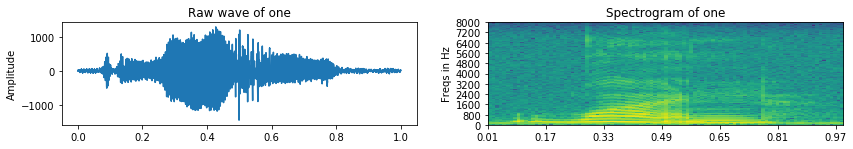

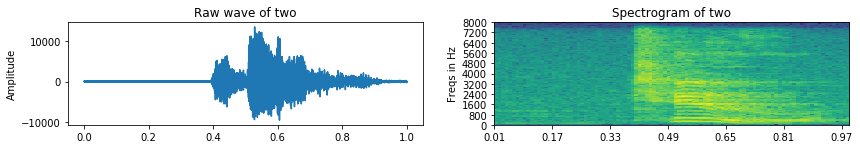

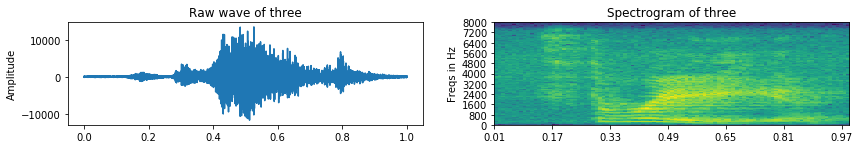

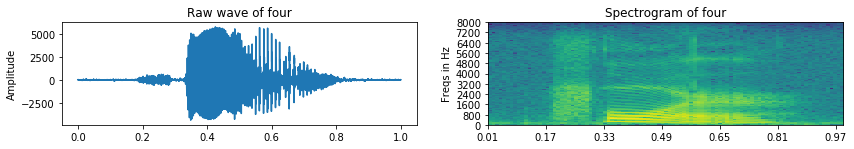

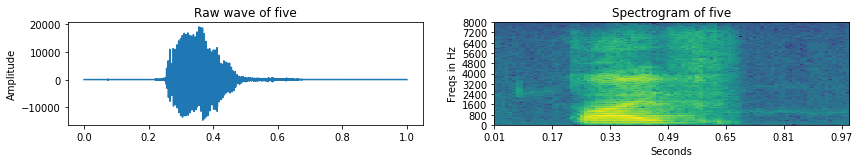

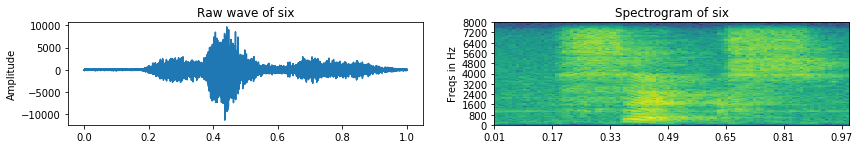

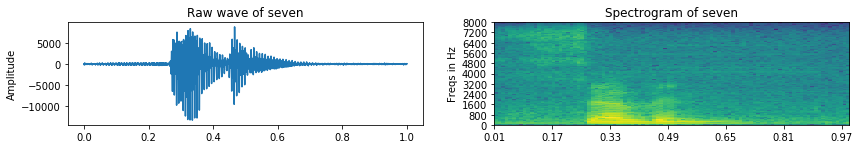

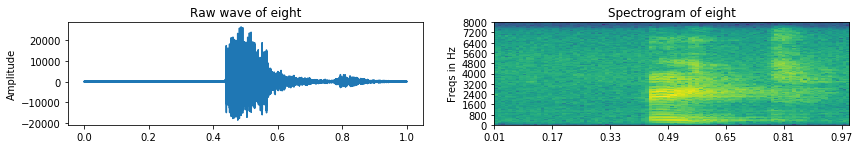

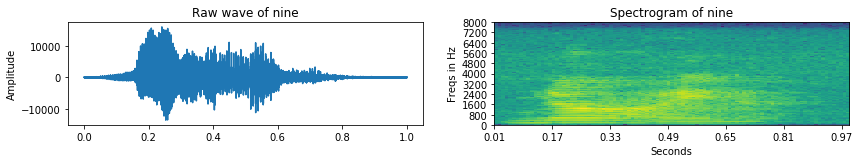

In [48]:
# Logarithmic spectogram
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# Plotting the wave corresponding to zero
freqs, times, spectrogram = log_specgram(samples_zero, sample_rate_zero)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(921)
ax1.set_title('Raw wave of zero')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_zero/len(samples_zero), sample_rate_zero), samples_zero)

ax2 = fig.add_subplot(922)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of zero')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to one
freqs, times, spectrogram = log_specgram(samples_one, sample_rate_one)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(923)
ax1.set_title('Raw wave of one')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_one/len(samples_one), sample_rate_one), samples_one)

ax2 = fig.add_subplot(924)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of one')
ax2.set_ylabel('Freqs in Hz')


# Plotting the wave corresponding to two
freqs, times, spectrogram = log_specgram(samples_two, sample_rate_two)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(925)
ax1.set_title('Raw wave of two')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_two/len(samples_two), sample_rate_two), samples_two)

ax2 = fig.add_subplot(926)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of two')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to three
freqs, times, spectrogram = log_specgram(samples_three, sample_rate_three)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(927)
ax1.set_title('Raw wave of three')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_three/len(samples_three), sample_rate_three), samples_three)

ax2 = fig.add_subplot(928)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of three')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to four
freqs, times, spectrogram = log_specgram(samples_four, sample_rate_four)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,9)
ax1.set_title('Raw wave of four')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_four/len(samples_four), sample_rate_four), samples_four)

ax2 = fig.add_subplot(9,2,10)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of four')
ax2.set_ylabel('Freqs in Hz')


# Plotting the wave corresponding to five
freqs, times, spectrogram = log_specgram(samples_five, sample_rate_five)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,11)
ax1.set_title('Raw wave of five')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_five/len(samples_five), sample_rate_five), samples_five)

ax2 = fig.add_subplot(9,2,12)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of five')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

# Plotting the wave corresponding to six
freqs, times, spectrogram = log_specgram(samples_six, sample_rate_six)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,11)
ax1.set_title('Raw wave of six')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_six/len(samples_six), sample_rate_six), samples_six)

ax2 = fig.add_subplot(9,2,12)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of six')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to seven
freqs, times, spectrogram = log_specgram(samples_seven, sample_rate_seven)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,13)
ax1.set_title('Raw wave of seven')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_seven/len(samples_seven), sample_rate_seven), samples_seven)

ax2 = fig.add_subplot(9,2,14)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of seven')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to eight
freqs, times, spectrogram = log_specgram(samples_eight, sample_rate_eight)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,15)
ax1.set_title('Raw wave of eight')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_eight/len(samples_eight), sample_rate_eight), samples_eight)

ax2 = fig.add_subplot(9,2,16)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of eight')
ax2.set_ylabel('Freqs in Hz')

# Plotting the wave corresponding to nine
freqs, times, spectrogram = log_specgram(samples_nine, sample_rate_nine)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(9,2,17)
ax1.set_title('Raw wave of nine')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate_nine/len(samples_nine), sample_rate_nine), samples_nine)

ax2 = fig.add_subplot(9,2,18)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of nine')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

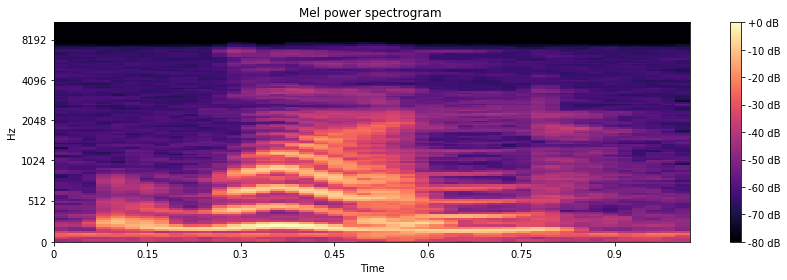

In [82]:
# Plotting the Mel power spectrogram
# From this tutorial
# https://github.com/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

samples, sample_rate = librosa.load(oneWave)
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

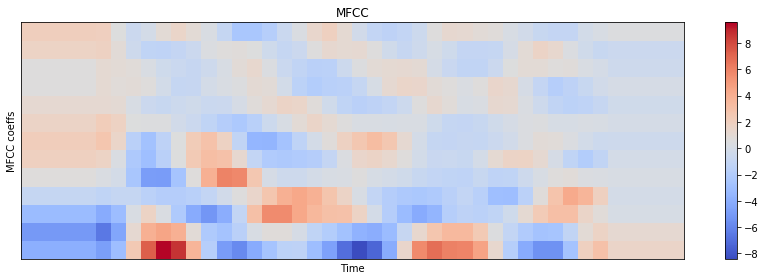

In [61]:
# Plotting the Mel power spectrogram coefficients
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

## Splitting the dataset for training the model

In [12]:
def splitDataset(wavDir, vList, tList):
    vListFolder = os.path.dirname(os.path.realpath(__file__)) + tList
    os.mkdir(vListFolder)
    #vListfile = open(vList, 'r')
    with open(vList, 'r') as vListfile:
        line = vListfile.readline()
        while line:
            folderLabel = line.split('/')
            filePath = folderLabel[0]+"\\"+folderLabel[1].split('.')[0]+".wav"
            if path.exists(wavDir+filePath):
                if not os.path.isdir(vListFolder+ folderLabel[0]):
                    os.mkdir(vListFolder + folderLabel[0]+"\\")
                shutil.copyfile(wavDir+filePath,vListFolder+filePath)
                os.remove(wavDir+filePath)
    vListfile.close()

## Extracting the MFCCs for the audio files
Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum").
    
After extracting the MFCCs, they are padded to create 32x32 MFCC based images. Then these images are used to train the CNN.

In [11]:
## Pre-processing and creating the melspectrum frequency coefficients to train the model

# To obtain MFCCs from a audio file using librosa module
def audio_to_melSpec(path,pad_len):
    # Load the wave file
    y, sr = librosa.load(path, mono=True, sr=None)
    y = y[::2]
    
    # Extract the MFCC's 
    melSpec = librosa.feature.mfcc (np.asfortranarray(y), sr=sr, n_mfcc = pad_len)
    pad_width = pad_len - melSpec.shape[1]
    
    # Pad the MFCCs to obtain a pad_width square image
    melSpec = np.pad(melSpec, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    return melSpec

# Traverse the dataset audio files to extract MFCCs
def dir_to_spectrogramMLP(audio_dir):
    labelDict = {"zero":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10}
    labels = os.listdir(audio_dir)
    specArr = []
    iolabels = []
    for label in labels:
        labelDir = audio_dir+label
        
        # Traversing all the files in the digit folder
        file_names = [f for f in listdir(labelDir) if isfile(join(labelDir, f)) and '.wav' in f]
        
        # Padding the MFCCs to create 32x32 images from MFCCs
        pad_len = 32
        
        # Calculating the MFCCs
        for file_name in file_names:
            audio_path = labelDir +"\\" +file_name
            
            # MFCCs of the audio file
            melSpec = audio_to_melSpec(audio_path,pad_len)
            specArr.append(melSpec)
            
            # Creating the labels for each audio file
            iolabels.append(labelDict[label])
            
    return np.asarray(specArr),iolabels

In [15]:
# Training input audio files directory path
audio_dir = dir_path + "\\SpeechCommands\\"

# Validation input audio files directory path
validList = dir_path + "\\validation_list.txt"

# Testing input audio files directory path
testList =  dir_path + "\\testing_list.txt"

# Split the dataset to create validation list and testing list
splitDataset(audio_dir, validList, "\\validationList\\")
splitDataset(audio_dir, testList, "\\testingList\\")

# Extract the MFCCs for training, validation and testing input audio files
[X_train,Y_train]=dir_to_spectrogramMLP(dir_path)
[X_valid,Y_valid]=dir_to_spectrogramMLP(dir_path + "\\validationList\\")
[X_test,Y_test]=dir_to_spectrogramMLP(dir_path + "\\testingList\\")

# Save the MFCC images to use while training and testing the models
np.savez('spokenDigit', X_train = X_train, Y_train=Y_train, X_valid=X_valid, Y_valid=Y_valid, X_test = X_test,Y_test = Y_test)

## Convolution neural network

The CNN architecture used in this project has three stages of convolution models followed by dense connected layer. Here is the architecture of the CNN model used:

```INPUT -> [CONV -> RELU -> CONV -> RELU -> CONV -> RELU -> POOL -> DROUPOUT]*[32,64,128] -> [FC -> RELU]*[128,64] -> [FC -> SOFTMAX]```

Inspired from ResNet :  Kaiming He et al. https://arxiv.org/abs/1512.03385

In [2]:
# CNN model with dense interconnected layer in the end
def cnnModel(shapeInput, noClasses):
    ## Convolution filters
    createCnn = Sequential()
    createCnn.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=shapeInput))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(MaxPooling2D(pool_size=(2, 2)))
    createCnn.add(Dropout(0.1))
    ## first convolution 'stage' ends
    
    createCnn.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(MaxPooling2D(pool_size=(2, 2)))
    createCnn.add(Dropout(0.1))
    ## Second convolution 'stage' ends
    
    createCnn.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(MaxPooling2D(pool_size=(2, 2)))
    createCnn.add(Dropout(0.25))
    createCnn.add(Flatten())
    ## End of convolution stage
    
    ## Dense strong interconnected layer
    createCnn.add(Dense(128, activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Dropout(0.25))
    ## first hidden layer ends
    
    createCnn.add(Dense(64, activation='relu'))
    createCnn.add(BatchNormalization())
    createCnn.add(Dropout(0.4))
    ## Second hidden layer
    
    createCnn.add(Dense(noClasses, activation='softmax'))
    
    ## Compile the model with crossentrophy with adadelta optimizer
    createCnn.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
    return createCnn

In [20]:
# Load the data
mfccData = np.load('spokenDigit.npz')
# Batch size for training
batch_size = 128
# Number of classifier classes
num_classes = 10
# Number od epochs for training
epochs = 40
# Number of channels
channels = 1
# Model number
no = 3

# Extract the training and validation data from the data
X_train = mfccData['X_train']
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], channels))
print("Size of the training images: "+str(X_train.shape))

X_valid = mfccData['X_valid']
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], channels))
print("Size of the valid images: "+str(X_valid.shape))

# Shape of the input layer for CNN
shapeInput = (X_train.shape[1], X_train.shape[2], channels)


Size of the training images: (18620, 32, 32, 1)
Size of the valid images: (2494, 32, 32, 1)


## Bulding and training the CNN model

Building the CNN model and training the model with training datatset audio files with the labeled spoken digits. I have used a batch size of 128 and 40 epochs to train the model.

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "trainCK/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 verbose=0, 
                                                 save_weights_only=True)

# Create a instance of the CNN model
model = cnnModel(shapeInput, num_classes)

# Fit the model witht the training dataset
trainCNNModel = model.fit(X_train,
                         to_categorical(mfccData['Y_train']),
                         batch_size=batch_size, epochs=epochs,
                         verbose=0,
                         validation_data=(X_valid, to_categorical(mfccData['Y_valid'])),
                         callbacks=[cp_callback])

# save the history
f = open('savedModels\\history_'+str(no)+'.pckl', 'wb')
pickle.dump(trainCNNModel.history, f)
f.close()

## Visualizing the trained model

Visualizing the accuracy and loss during the training process.

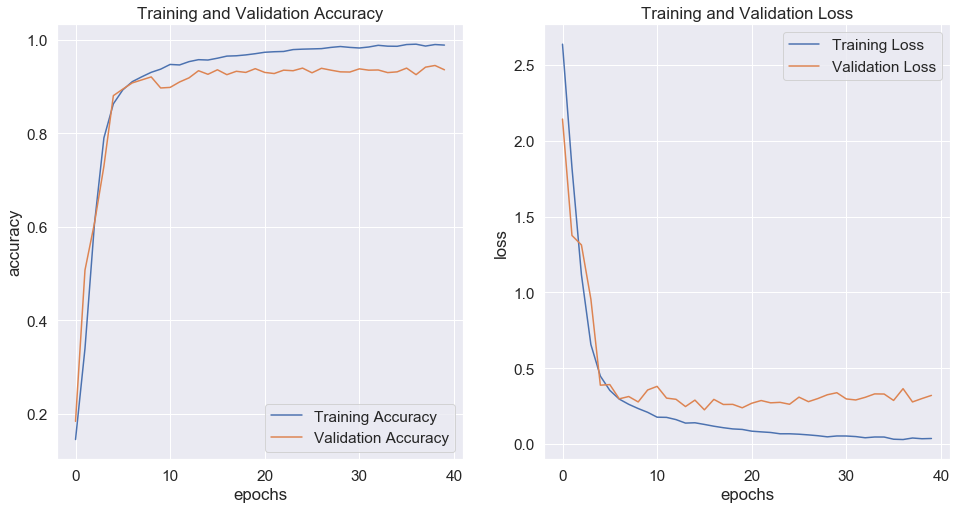

In [21]:
# Retrieve the training model history
f = open('history_'+str(no)+'.pckl', 'rb')
historyModel = pickle.load(f)
f.close()

## Visualizing the model
# Model training accuracy
acc = historyModel['accuracy']

# Model validation accuracy
val_acc = historyModel['val_accuracy']

# Model training loss
loss = historyModel['loss']

# Model validation loss
val_loss = historyModel['val_loss']

# epochs range to plot
epochs_range = range(epochs)

# Plot for training and validation accuracy
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')

# Plot for training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.show()

## Load the model

Loading the trainined model to predict the spoken digit for the test examples.

In [22]:
trainedModel = tf.keras.models.load_model('savedModels\\trained_model_3.h5')
trainedModel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 31, 31, 32)        160       
_________________________________________________________________
batch_normalization_45 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 30, 32)        4128      
_________________________________________________________________
batch_normalization_46 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 29, 29, 32)        4128      
_________________________________________________________________
batch_normalization_47 (Batc (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)       

## Predictions

Predicitng the spoken digit to calculate the prediction accuracy of the model

In [23]:
# Extracting the test data
X_test = mfccData['X_test']
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], channels))

# Predicting the digits from model
predictions = trainedModel.predict_classes(X_test)

# Comparing predictions for accuracy calculation
reportPrediction = classification_report(to_categorical(mfccData['Y_test']), to_categorical(predictions))
print(reportPrediction)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       250
           1       0.98      0.94      0.96       248
           2       0.93      0.94      0.93       264
           3       0.93      0.93      0.93       267
           4       0.97      0.94      0.95       253
           5       0.96      0.95      0.95       271
           6       0.85      0.95      0.90       244
           7       0.90      0.94      0.92       239
           8       0.99      0.85      0.92       257
           9       0.93      0.98      0.95       259

   micro avg       0.94      0.94      0.94      2552
   macro avg       0.94      0.94      0.94      2552
weighted avg       0.94      0.94      0.94      2552
 samples avg       0.94      0.94      0.94      2552



[[238   0   1   3   2   0   2   3   0   1]
 [  0 232   0   0   1   6   2   2   0   5]
 [  3   0 247   1   3   1   3   5   1   0]
 [  0   0   7 247   1   1   3   6   1   1]
 [  1   1   1   1 238   3   2   6   0   0]
 [  0   3   1   1   0 258   1   0   0   7]
 [  2   1   1   5   0   0 233   1   0   1]
 [  2   0   2   0   1   1   5 225   0   3]
 [  1   0   5   8   0   0  23   0 219   1]
 [  1   0   2   1   0   0   1   1   0 253]]


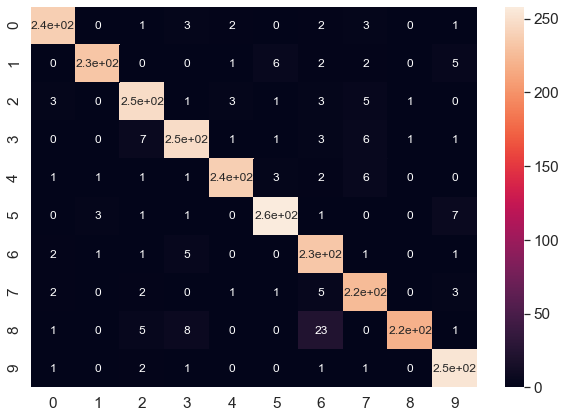

In [18]:
cfMat = confusion_matrix(mfccData['Y_test'],predictions,labels=[0,1,2,3,4,5,6,7,8,9])
print (cfMat)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cfMat, annot=True, annot_kws={"size": 12}) # font size

plt.show()